In [7]:
from google.colab import drive
drive.mount('/content/drive')
import os
BASE_DIR = "/content/drive/MyDrive/Job/Data Science"
os.chdir(BASE_DIR)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Exploratory Data Analysis (EDA): Perform exploratory data analysis to gain insights into the dataset. You can analyze the distribution of questions, explore word frequencies, identify patterns, and visualize relationships between variables. EDA can provide a deeper understanding of the dataset and help you formulate further data science tasks.

   Question_ID                                          Questions  \
0      1590140        What does it mean to have a mental illness?   
1      2110618                    Who does mental illness affect?   
2      6361820                        What causes mental illness?   
3      9434130  What are some of the warning signs of mental i...   
4      7657263            Can people with mental illness recover?   

                                             Answers  
0  Mental illnesses are health conditions that di...  
1  It is estimated that mental illness affects 1 ...  
2  It is estimated that mental illness affects 1 ...  
3  Symptoms of mental health disorders vary depen...  
4  When healing from mental illness, early identi...  
        Question_ID
count  9.800000e+01
mean   5.127967e+06
std    2.696725e+06
min    1.030153e+06
25%    2.889464e+06
50%    4.788133e+06
75%    7.626698e+06
max    9.679704e+06


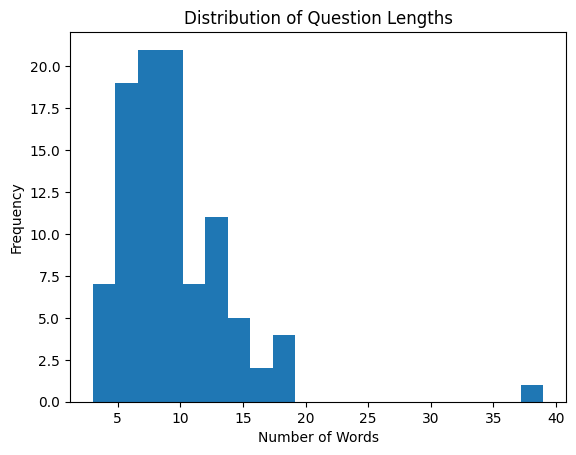

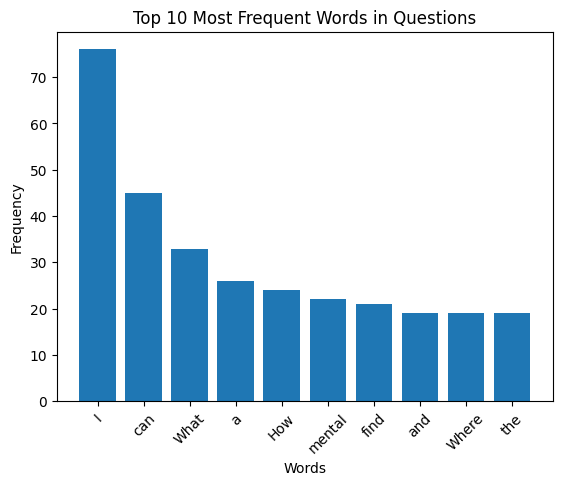

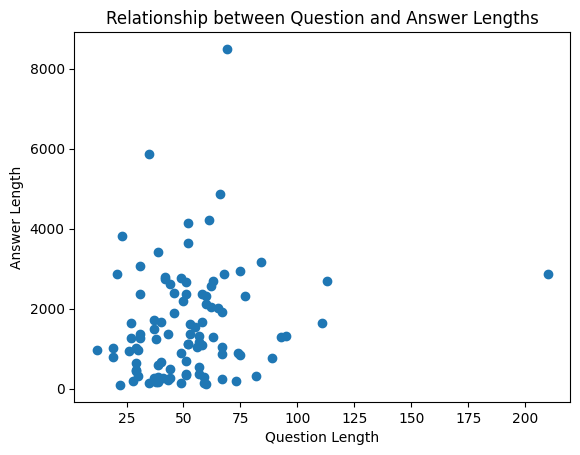

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('Mental_Health_FAQ.csv')

# Display the first few rows of the dataset
print(df.head())

# Summary statistics of the dataset
print(df.describe())

# Distribution of questions
question_lengths = df['Questions'].str.split().apply(len)
plt.hist(question_lengths, bins=20)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Question Lengths')
plt.show()

# Word frequencies in questions
word_frequencies = df['Questions'].str.split().explode().value_counts()
top_words = word_frequencies.head(10)
plt.bar(top_words.index, top_words.values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Questions')
plt.xticks(rotation=45)
plt.show()

# Relationship between question and answer lengths
df['Question_Length'] = df['Questions'].str.len()
df['Answer_Length'] = df['Answers'].str.len()
plt.scatter(df['Question_Length'], df['Answer_Length'])
plt.xlabel('Question Length')
plt.ylabel('Answer Length')
plt.title('Relationship between Question and Answer Lengths')
plt.show()


Text Classification

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('Mental_Health_FAQ.csv')

# Print the column names to identify the correct category column
print(df.columns)

Index(['Question_ID', 'Questions', 'Answers'], dtype='object')


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('Mental_Health_FAQ.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Questions'], df['Question_ID'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Make predictions on the test data
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     1030153       0.00      0.00      0.00       0.0
     1043721       0.00      0.00      0.00       0.0
     1546812       0.00      0.00      0.00       0.0
     1585622       0.00      0.00      0.00       1.0
     1590140       0.00      0.00      0.00       1.0
     1619387       0.00      0.00      0.00       0.0
     1667863       0.00      0.00      0.00       1.0
     1706961       0.00      0.00      0.00       0.0
     1833460       0.00      0.00      0.00       0.0
     2115228       0.00      0.00      0.00       0.0
     2447683       0.00      0.00      0.00       0.0
     2553795       0.00      0.00      0.00       1.0
     2612846       0.00      0.00      0.00       0.0
     2746837       0.00      0.00      0.00       0.0
     3166337       0.00      0.00      0.00       1.0
     3340726       0.00      0.00      0.00       1.0
     4197817       0.00      0.00      0.00       1.0
     4200873       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.